# Arredondo Pérez Leonardo
## Estadísctica III

# Ejercicio 1

1. El método más utilizado para estimar los parámetros de una serie de tiempo es llamado "Método de Máxima
Verosimilitud", el cual consiste en maximizar la función de log-verosimilitud correspondiente a una muestra
aleatoria. Como ejemplo, tomemos un proceso AR(1). Asumiendo una distribución Gaussiana para el ruido
blanco:

**Dem**

Sea $$X_{t}=\phi X_{t-1}+Z_{t}$$ 
$$ X_{t}|{X_{t-1}}_{\tilde{}}N(\phi X_{t-1},\sigma^2)$$
$$f(x_{0},x_{1},...,x_{t}|\phi)=f(x_{t}|x_{t-1},...,x_{0})f(x_{t-1}|x_{t-2},...,x_{0}) $$
$$=\prod_{i=1}^{n}f_{\phi}(x_{t}|x_{t-1},...,x_{0})f_{\phi}x_{0}$$
$$ =\frac{e^\frac{-(X_{t}-\phi X_{t-1})^2}{2 \sigma^2}}{\sqrt{2\pi\sigma^2}}$$
$$L(\tilde{\phi})=\sum_{t=1}^{n}ln(\frac{e^\frac{-(X_{t}-\phi X_{t-1})^2}{2 \sigma^2}}{\sqrt{2\pi\sigma^2}})$$

$$=-\frac{-(X_{t}-\phi X_{t-1})^2}{2 \sigma^2}ln(e)-ln(\sqrt{2\pi\sigma^2})$$
$$=-\frac{-(X_{t}-\phi X_{t-1})^2}{2 \sigma^2}-ln(\sqrt{2\pi\sigma^2}) $$
$$\frac{\partial L(\theta) }{\partial(\phi}=\frac{-(X_{t}-\phi X_{t-1})X_{t-1}}{\sigma^2} $$

$$\frac{\partial L(\theta) }{\partial(\phi}=\frac{-(X_{t}-\phi X_{t-1})X_{t-1}}{\sigma^2}=0$$
$$->\phi=\frac{\sum_{t=1}^{n}X_{t}}{X_{t-1}}  , \sigma^2=0$$


2. Uno de los indicadores más utilizados para determinar si el modelo utilizado en una serie de tiempo es el criterio
de información de Akaike (Akaike Information Criterion). Investigue en qué consiste dicho indicador y de una
breve explicación al respecto.

Es una medida estadística para la evaluación comparativa entre modelos de series temporales, el AIC  no realiza una prueba de hipótesis,indicará el modelo que se ajusta un poco mejor a los datos u observaciones disponibles que los otros.AIC proporciona una estimación de la información perdida cuando se utiliza un modelo específico para representar el proceso que generó los datos

$AIC=2\frac{k-l}{n}$

donde:

n es el número de observarciones

k el número de parametros a estimar

l la función  logsimilitud del nuestro estimador


3.- En clase vimos que un método muy utilizado para determinar el orden de una serie de tiemp (es decir, si el
proceso es AR(1), AR(2), etc...), era calculando la ACF y la PACF de la serie de tiempo. No obstante, existe
una alternativa que es encontrar el orden lat que el criterio de AIC se maximice. Implemente una función tal que
para un orden máximo dado, la función busque sobre todos los órdenes menores a este valor máximo y seleccione
el orden con un criterio de AIC máximo.

In [1]:
import pandas as pd
import numpy as np
PIB_EUA=pd.read_csv('Data_tarea_30_abril.csv');PIB_EUA.head()

,Date,GDP
0,01/01/47,237.2
1,04/01/47,240.5
2,07/01/47,244.6
3,10/01/47,254.4
4,01/01/48,260.4


In [2]:
import math as mt
def AIC(k,Serie=PIB_EUA.GDP,fi=0.5):
    n=len(Serie)
    sigma=Serie.var()
    l=sum(-mt.log10(mt.sqrt(sigma*mt.pi))-(Serie[i]-fi*Serie[i-1])**2/(2*sigma) for i in range(1,n))
    return 2*(k-l)/n 
def MAX_AIC(n):
    lista= [AIC(i) for i in range(n)];return lista.index(max(lista))
#     return lista
MAX_AIC(30)

29

4.- Implemente una función en Python que calcule la función de autocorrelación parcial para una serie de tiempo
dada.

In [3]:
def ACF(h,Serie=PIB_EUA.GDP):
    vec_acf = []
    n=len(Serie[:len(Serie)-h+1])
    mean=Serie.mean()
    for i in range(n-1):
        vec_acf.append((Serie[i]-mean)*(Serie[i+h]-mean))
    return 1 if h==0 else np.array(vec_acf).sum()/((len(Serie)-h)*np.array(Serie).var())
def PACF(k,Serie=PIB_EUA.GDP): 
    PACFS=[ACF(0),ACF(1),(ACF(2)-ACF(1)**2)/(1-ACF(1)**2)]
    PACFS2=[]
    def condin2(tupla): 
        if tupla[0] is tupla[1]:
                return PACFS[tupla[0]]
        return  PACFS2[PACFS2.index(str(tupla[0])+str(tupla[1]))+1]
    def condin(tupla): 
        if tupla[0] is tupla[1]:
            return PACFS[tupla[0]]  
        return condin2((tupla[0]-1,tupla[1]))-PACFS[tupla[0]]*condin2((tupla[0]-1,tupla[0]-tupla[1]))
    while len(PACFS)<k+1:
        t=len(PACFS)
        for i in range(1,t):
            if t-1!=i:
                PACFS2+=[str(t-1)+str(i),condin((t-1,i))]
        ACFS=[ACF(e) for e in range(1,t)]
        LAGS=[condin2((t-1,l)) for l in range(1,t)]
        PACFS+=[(ACF(t)-sum([lag*ACFS[x] for lag,x in zip(LAGS,range(len(ACFS)-1,-1,-1))]))
                /(1-sum([LAG*acf for LAG,acf in zip(LAGS,ACFS)]))]
    return PACFS

6. Investiguen en qué consiste la gráca de Cuantil-Cuantil ó QQ-plot.
 * 6.1 Realice un análisis exploratorio de los datos. La serie de tiempo es estacionaria? Qué alternativas propone
para "quitarle" la tendencia a la serie de tiempo?
 * 6.2 Calcule la ACF y la PACF del proceso estacionario utilizando tanto las librerías de Python como sus
funciones implementadas.Qué pueden decir sobre los grácos observados?
 * 6.3 Ajuste un modelo, ya sea AR o MA utilizando las librerías de Python. Para determinar el órden de los
modelos, utilice tanto el criterio de ACF y PACF como el criterio mencionado en la pregunta 3.
 * 6.4 Haga un análisis de los resultados del modelo que eligieron. Es buen modelo? Qué pueden decir sobre la
signicancia de los parámetros del modelo?
 * 6.5 Hagan un análisis de los residuales resultantes del modelo? Cómo se distribuyen? Qué dice la QQ-Plot al
respecto?
 * 6.6 A partir de su modelo, pueden realizar un pronóstico de la serie de tiempo utilizando la función "forecast"
contenida en la paquetería "statsmodels" en Python. Investiguen el funcionamiento de dicha función y
hagan un pronóstico de 5 trimestres adelante. Qué opinan de los resultados?

###  6.1

In [4]:
PIB_EUA.GDP.plot(); 
#la serie de tiempo es estacionaria, para poderle quitar la tendencia sumandole un modelo AR(1) o MA(1)

### 6.2

In [5]:
#ACF & PACF
display([ACF(i) for i in range(50)],PACF(50))

[1,
 0.9677810851105767,
 0.9352537640958861,
 0.9020341564413299,
 0.8701394084846709,
 0.838404702255217,
 0.8068119974224109,
 0.7765405220986751,
 0.7476368761785268,
 0.7178826938377194,
 0.6872203513656407,
 0.6545290192136148,
 0.6204698607696659,
 0.5865283670096212,
 0.5528220192115407,
 0.5193494073582329,
 0.48786662650962026,
 0.45863918088037986,
 0.43027699142982806,
 0.4019781865663798,
 0.37500657158423994,
 0.34686433626799473,
 0.3186387419910118,
 0.2904152345052204,
 0.2640880817473975,
 0.2379430349151542,
 0.21220603234913224,
 0.18555049500394422,
 0.1575935145370461,
 0.12773345556175875,
 0.09689057820380344,
 0.06561439492889727,
 0.0357716649005139,
 0.007855251802838858,
 -0.01930359766239363,
 -0.04547305534076465,
 -0.07232968588522042,
 -0.10272648510340487,
 -0.13441474169006595,
 -0.16827216275357096,
 -0.200372621574249,
 -0.23283713992364355,
 -0.2674476226993781,
 -0.30088096428606315,
 -0.3354779412092146,
 -0.3709245041059471,
 -0.4052996382982091,

[1,
 0.9677810851105767,
 -0.02123768862668782,
 -0.02770958201668328,
 0.0035534599377233353,
 -0.014609887351914213,
 -0.01549640440016749,
 0.0037299834855429965,
 0.004389865139584728,
 -0.030646047506216738,
 -0.031218274267505473,
 -0.04888878696825783,
 -0.04123237344933027,
 -0.018419372934228136,
 -0.017664697861346532,
 -0.019176658458794214,
 0.00830348130354924,
 0.012818859374038111,
 -0.00901740848466248,
 -0.01848078516839884,
 0.0035217107096971513,
 -0.036358734330777825,
 -0.020152571477870956,
 -0.017367292715486853,
 0.008463927974528097,
 -0.01983767007499138,
 -0.017654839826211955,
 -0.03864415044808973,
 -0.04699278514588607,
 -0.054734428305009804,
 -0.04187937222749906,
 -0.033090372602757434,
 -0.0048018443734882815,
 0.002287815049601804,
 -0.01909138473884077,
 -0.013576421938070677,
 -0.0387441191284532,
 -0.0860239280255959,
 -0.05081105462022549,
 -0.06349098803745663,
 -0.008459352082956268,
 -0.04315634072414607,
 -0.08023724583688464,
 -0.033179089199

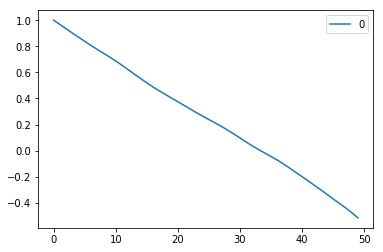

In [6]:
#grafia ACF
pd.DataFrame([ACF(i) for i in range(50)]).plot();

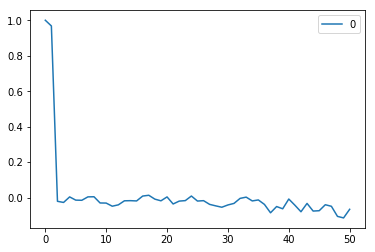

In [7]:
#Grafica PACF
pd.DataFrame(PACF(50)).plot();

### 6.3

In [8]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_process import arma_generate_sample


C:\Users\leona\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [9]:
def ar1(numSamples,phi=0.7):
    normales=np.random.randn(numSamples)
    ar=np.zeros(len(normales))
    ar[0]=0
    for i in range(len(normales)-1):
        ar[i+1]=phi*ar[i]+normales[i] #este es el ruido blanco, v.a's normales
    return ar
def ma(numSamples,phi=0.7):
    normales=np.random.randn(numSamples)
    MA=np.zeros(len(normales))
    MA[0]=0
    for i in range(len(normales)-1):
        MA[i+1]=phi*normales[i]+normales[i+1] #este es el ruido blanco, v.a's normales
    return MA
model = sm.OLS(PIB_EUA.index,PIB_EUA.GDP).fit()
resid=model.resid


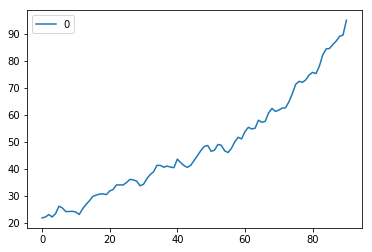

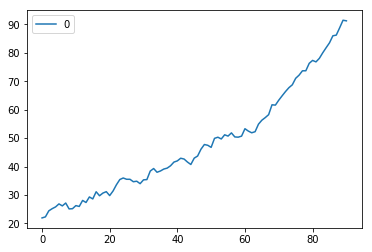

In [10]:
b=model.params[0]
X=[x*b+i for x,i in zip(PIB_EUA.GDP,ma(len(PIB_EUA)))]
Y=[x*b+i for x,i in zip(PIB_EUA.GDP,ar1(len(PIB_EUA)))]
pd.DataFrame(X).plot();
pd.DataFrame(Y).plot();

In [11]:
PACF(58,X),PACF(58,Y)

([1,
  0.9677810851105767,
  -0.02123768862668782,
  -0.02770958201668328,
  0.0035534599377233353,
  -0.014609887351914213,
  -0.01549640440016749,
  0.0037299834855429965,
  0.004389865139584728,
  -0.030646047506216738,
  -0.031218274267505473,
  -0.04888878696825783,
  -0.04123237344933027,
  -0.018419372934228136,
  -0.017664697861346532,
  -0.019176658458794214,
  0.00830348130354924,
  0.012818859374038111,
  -0.00901740848466248,
  -0.01848078516839884,
  0.0035217107096971513,
  -0.036358734330777825,
  -0.020152571477870956,
  -0.017367292715486853,
  0.008463927974528097,
  -0.01983767007499138,
  -0.017654839826211955,
  -0.03864415044808973,
  -0.04699278514588607,
  -0.054734428305009804,
  -0.04187937222749906,
  -0.033090372602757434,
  -0.0048018443734882815,
  0.002287815049601804,
  -0.01909138473884077,
  -0.013576421938070677,
  -0.0387441191284532,
  -0.0860239280255959,
  -0.05081105462022549,
  -0.06349098803745663,
  -0.008459352082956268,
  -0.0431563407241460

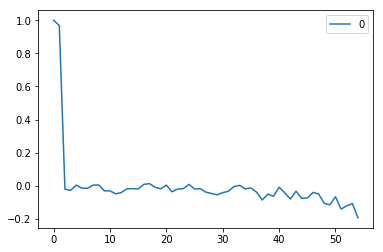

In [12]:
pd.DataFrame(PACF(54,X)).plot(); #Es una ACF(54)

In [13]:
print(model.summary())
#con esto vemos que es un buen modelo, se ajusta más del 96% de los datos

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2551.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           7.83e-68
Time:                        21:57:56   Log-Likelihood:                -335.13
No. Observations:                  91   AIC:                             672.3
Df Residuals:                      90   BIC:                             674.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP            0.0924      0.002     50.505      0.0

In [14]:
modelAr = sm.OLS(np.arange(len(X)),X).fit()
print(modelAr.summary())
modelMA = sm.OLS(np.arange(len(Y)),Y).fit()
print(modelMA.summary())
residAr,residMA=modelAr.resid,modelMA.resid

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2589.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           4.09e-68
Time:                        21:57:56   Log-Likelihood:                -334.47
No. Observations:                  91   AIC:                             670.9
Df Residuals:                      90   BIC:                             673.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9925      0.020     50.884      0.0

### 6.4
Apoyandonos del sumario de los modelos, podemos ver que ambos modelos tienen un buen nivel de ajuste, tanto el principal como el del modelo MA(1) se ajuntan al 96%, con el AR(1) se ajusta ak 96.7%
 Son buenos modelos y logran quitar un poco la estacionalidad, ademas es casi nula la probabilidad del  error tipo dos en ambos

In [15]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_process import arma_generate_sample

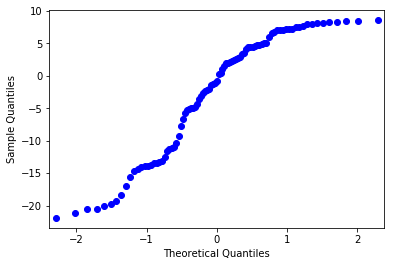

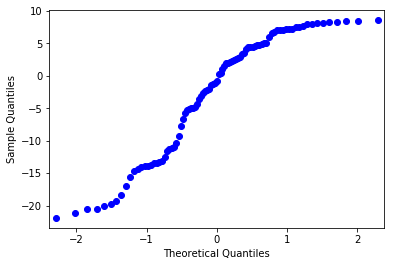

In [16]:
#graficas de qqplot residuales completos 
qqplot(resid)

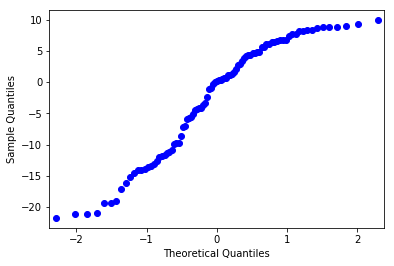

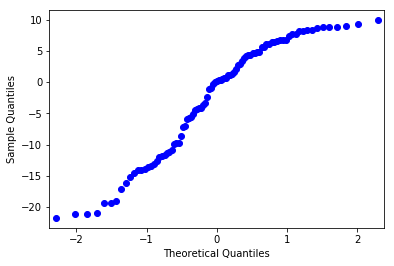

In [17]:
qqplot(residAr)

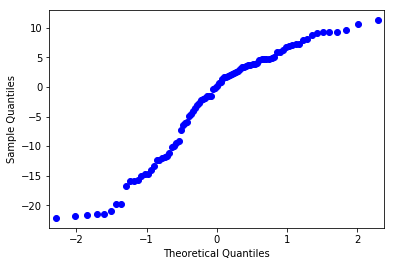

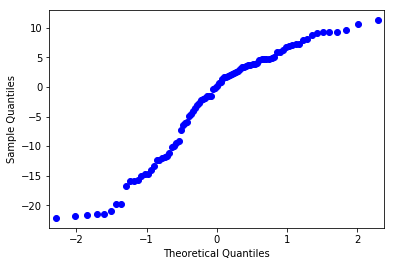

In [18]:
qqplot(residMA)

Vemos que los residuales tiene una tendencia normal,con colas del lado izquierdo

# 6.6

import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

91    1010.700942
92    1025.441517
93    1034.175771
94    1045.911039
95    1057.239004
Name: Forecast, dtype: float64

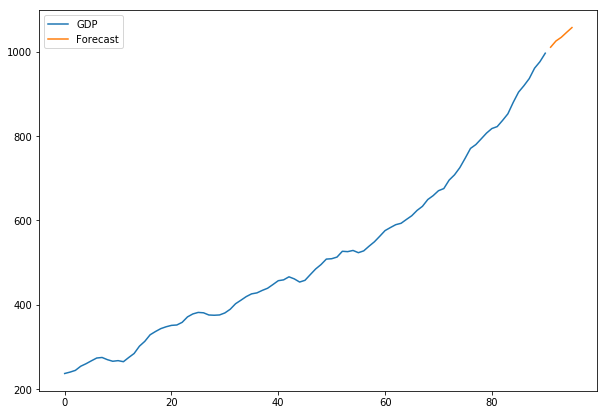

In [36]:
model = SARIMAX(PIB_EUA['GDP'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
forecast = result.predict(start = len(PIB_EUA), 
                          end = (len(PIB_EUA)-1) + 5, 
                          typ = 'GDP').rename('Forecast')
  
PIB_EUA['GDP'].plot(figsize = (10, 7), legend = True)
forecast.plot(legend = True);
display(forecast)

Se ve un buen pronostico, se puede ver que si va a favor de la tendencia de la serie